In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

#### Let's load the Nashville zipcode data and look at the first few rows
- geopandas reads files with the `read_file()` method
- The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku


In [2]:
districts = gpd.read_file('../data/council_districts.geojson')
print(districts.crs)
districts.head()

EPSG:4326


,OBJECTID,DISTRICT,DistrictName,Representative,Website,LastName,FirstName,Email,BusinessPhone,GlobalID,geometry
0,1,1,Council District 1,Joy Kimbrough,https://www.nashville.gov/departments/council/...,Kimbrough,Joy,Joy.Kimbrough@nashville.gov,615-432-1301,175122a7-0429-46d1-83e4-40ace7cbcbb3,"POLYGON ((-86.90726 36.39049, -86.90713 36.390..."
1,2,2,Council District 2,Kyonzté Toombs,https://www.nashville.gov/departments/council/...,Toombs,Kyonzté,Kyonzte.Toombs@nashville.gov,615-432-1302,03f26656-e9af-44b4-8ca2-4ef1ff72e63b,"POLYGON ((-86.76072 36.22440, -86.76084 36.224..."
2,3,3,Council District 3,Jennifer Gamble,https://www.nashville.gov/departments/council/...,Gamble,Jennifer,Jennifer.Gamble@nashville.gov,615-432-1303,b07920af-c9cd-4e05-aae1-a58e2c6a5df1,"POLYGON ((-86.77734 36.30993, -86.77686 36.309..."
3,4,4,Council District 4,Mike Cortese,https://www.nashville.gov/departments/council/...,Cortese,Mike,Mike.Cortese@nashville.gov,615-432-1304,f316ee19-c016-4c45-8ac7-ba2cd1821c9b,"POLYGON ((-86.72508 36.04493, -86.72497 36.044..."
4,5,5,Council District 5,Sean Parker,https://www.nashville.gov/departments/council/...,Parker,Sean,Sean.Parker@nashville.gov,615-432-1305,1dbc7f41-775f-45ca-8706-cd044cd1c75b,"POLYGON ((-86.75041 36.25514, -86.74973 36.255..."


In [3]:
type(districts)

geopandas.geodataframe.GeoDataFrame

#### Now let's look at the difference between calling the first geometry variable.....


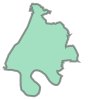

In [4]:
districts.loc[0, 'geometry']

#### ...and printing it


In [5]:
print(districts.loc[0, 'geometry'])

POLYGON ((-86.9072561701536 36.3904897476644, -86.9071309501212 36.3904731064559, -86.9071030614117 36.3904705685393, -86.907033008655 36.390465049703, -86.9067954798914 36.3903723359825, -86.9065606687478 36.3902796014436, -86.9063474995936 36.3901779119766, -86.9060988742636 36.3900655021742, -86.906005206164 36.3900274374377, -86.9059077251219 36.3899878222603, -86.9058580187666 36.3899761702009, -86.9057442059871 36.3899494909122, -86.9056161694653 36.3899240779368, -86.9055125935585 36.3898984818413, -86.9054112319082 36.3898289195571, -86.9054120830197 36.3898208446924, -86.9053350380957 36.389794008449, -86.9053262006704 36.3897614314371, -86.9052275333877 36.389689651312, -86.9051209126999 36.3896355102809, -86.9049300678142 36.3895841958177, -86.9047828313264 36.3895435427646, -86.9045997877267 36.3894614051338, -86.9044550182161 36.3893987584764, -86.9043566026103 36.3893489511039, -86.9042282410675 36.3892949711489, -86.9040705111323 36.3892873592074, -86.9039786603373 36.38

#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


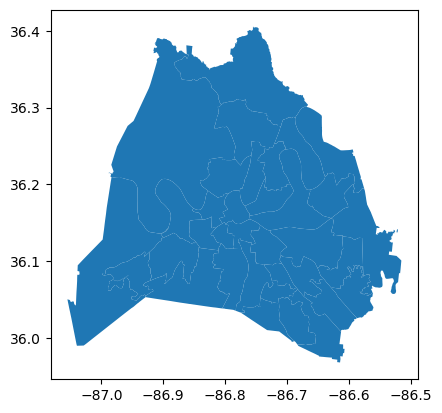

In [6]:
districts.plot();

#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by [`matplotib`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)


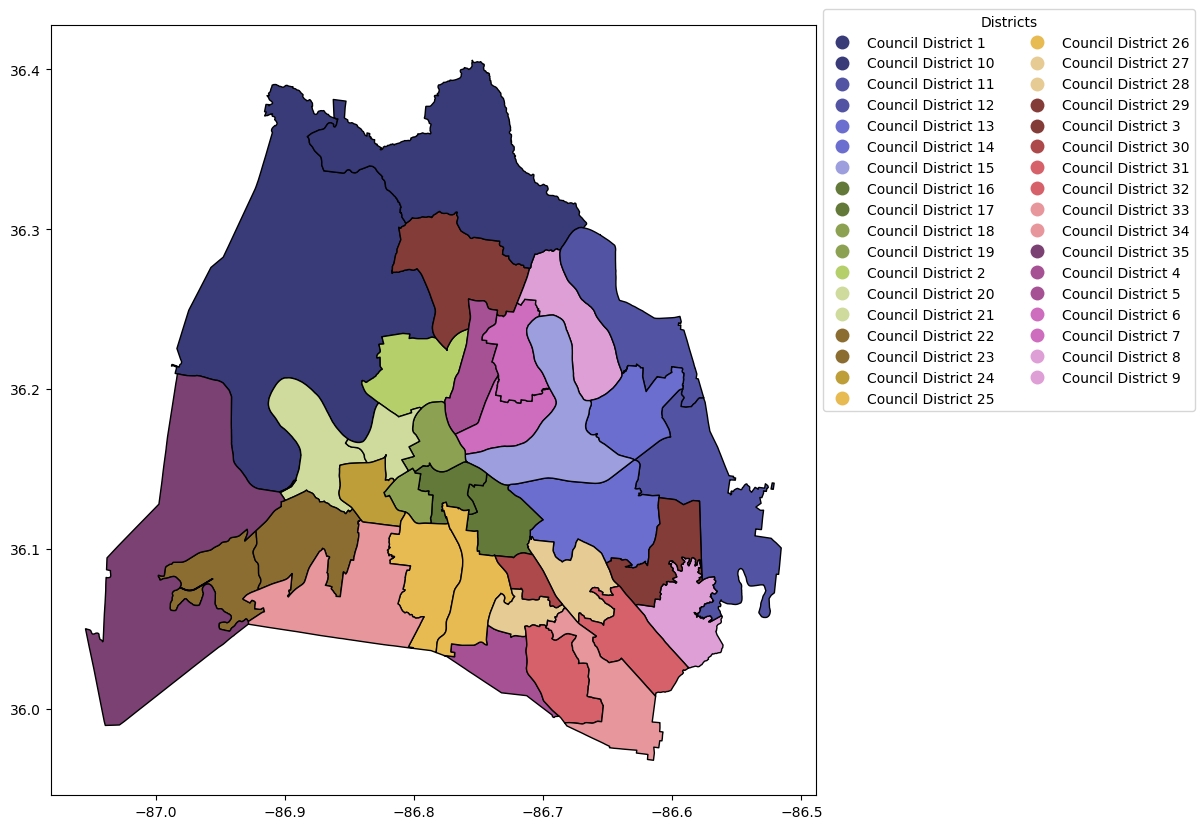

In [7]:
#geopandas will take care of legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Districts', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

districts.plot(column = 'DistrictName', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'tab20b')
plt.show()

#### Next you will read in the bus stop data
- downloaded from https://data.nashville.gov/Transportation/Regional-Transportation-Authority-Bus-Stops/p886-fnbd
- cleaned:
    - rename columns 
    - drop unwanted columns 
    - parse `lat` and `lng` columns from `location`
- print the shape 
- take a look at the first 3 rows

In [8]:
sidewalks = gpd.read_file('../data/Sidewalks_View.geojson')
print(sidewalks.shape)
sidewalks.head(3)

(14913, 14)


,OBJECTID,RouteId,OnStreet,FromStreet,ToStreet,Side,Condition,District,DateRepaired,RepairScoreWalkNBike,SidewalkWidth,RepairConstructionCost,GlobalID,geometry
0,1,10090.0,Middlewick Ln,Caswick Ct,Parkfield Dr,S,GOOD,31,None,0.0,5,0.0,b159d381-f953-420b-81bb-3843a51661e0,"LINESTRING (-86.67378 35.98631, -86.67377 35.9..."
1,2,10440.0,Welshcrest Dr,Welshcrest Pl,Cul-De-Sac,S,GOOD,32,None,0.0,5,0.0,5657f9b5-9b78-49df-9137-615afce3746c,"LINESTRING (-86.64816 36.06858, -86.64815 36.0..."
2,3,6911.0,Old Hickory Blvd,Tom Hartley Dr,Iris Ave,E,FAIR,11,None,50.0,5.5,0.0,d2cc9e87-e3d6-4d7c-bc77-bd1cd8cf6727,"LINESTRING (-86.63702 36.24432, -86.63702 36.2..."


In [9]:
sidewalks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 14913 entries, 0 to 14912
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   OBJECTID                14913 non-null  int64   
 1   RouteId                 14907 non-null  float64 
 2   OnStreet                14913 non-null  object  
 3   FromStreet              14911 non-null  object  
 4   ToStreet                14909 non-null  object  
 5   Side                    14894 non-null  object  
 6   Condition               14151 non-null  object  
 7   District                14890 non-null  object  
 8   DateRepaired            2178 non-null   object  
 9   RepairScoreWalkNBike    12607 non-null  float64 
 10  SidewalkWidth           13638 non-null  object  
 11  RepairConstructionCost  12608 non-null  float64 
 12  GlobalID                14913 non-null  object  
 13  geometry                14901 non-null  geometry
dtypes: float64(3),

- you want the CRS for the bus stops to match the CRS in the zipcodes GeoDataFrame 


In [10]:
districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry (we will use the geopandas `points_from_xy()` method to create a Point geometry)

In [27]:
sidewalk_geo = gpd.GeoDataFrame(sidewalks, 
                           crs = districts.crs, 
                           geometry = sidewalks.geometry)

In [28]:
type(sidewalk_geo)

geopandas.geodataframe.GeoDataFrame

In [29]:
districts = districts[['DISTRICT', 'Representative', 'geometry']]

In [30]:
sidewalks_by_district = gpd.sjoin(sidewalk_geo, districts, predicate = 'within')

In [31]:
sidewalks_by_district.head()

,OBJECTID,RouteId,OnStreet,FromStreet,ToStreet,Side,Condition,District,DateRepaired,RepairScoreWalkNBike,SidewalkWidth,RepairConstructionCost,GlobalID,geometry,index_right,DISTRICT,Representative
1,2,10440.0,Welshcrest Dr,Welshcrest Pl,Cul-De-Sac,S,GOOD,32,None,0.0,5,0.0,5657f9b5-9b78-49df-9137-615afce3746c,"LINESTRING (-86.64816 36.06858, -86.64815 36.0...",31,32,Joy Styles
2,3,6911.0,Old Hickory Blvd,Tom Hartley Dr,Iris Ave,E,FAIR,11,None,50.0,5.5,0.0,d2cc9e87-e3d6-4d7c-bc77-bd1cd8cf6727,"LINESTRING (-86.63702 36.24432, -86.63702 36.2...",10,11,Jeff Eslick
3,4,37.0,26th Ave N,Alameda St,Albion St,E,POOR,21,None,145.0,5,0.0,605aad62-aeb7-4aa9-b755-2f0dfbb32e60,"LINESTRING (-86.81630 36.16604, -86.81630 36.1...",20,21,Brandon Taylor
4,5,9646.0,Goins Rd,Nolensville Pike,Old Goins Rd,S,GOOD,30,None,0.0,5,0.0,933bb0d1-cfa5-422a-8fa5-2fae2c125fc9,"LINESTRING (-86.72442 36.07398, -86.72442 36.0...",26,27,Robert Nash
5,6,5936.0,Bridgepoint Dr,Creekbend Dr,Vista Ln,S,GOOD,03,None,0.0,5,0.0,0fbf918d-ea2f-4117-a7e3-79d013769437,"LINESTRING (-86.79837 36.23427, -86.79836 36.2...",0,1,Joy Kimbrough


#### Now that the data is joined spatially you can count the bus stops by zip code  and see how many stops are within each polygon 
- using the `value_counts()` method


In [34]:
grouped_sidewalk_length = sidewalks_by_district.groupby('District')['RouteId']

In [ ]:
print(grouped_sidewalk_length)

#### Let's take a closer look at the 272 bus stops in the 37207 zip code
- filter the stops_by_zip data to just get bus stops in 37207
- filter the zip code geodataframe to just the polygon (row) for 37207


In [26]:
sidewalk_d5 = sidewalks_by_district[sidewalks_by_district['District'] == '05']
sidewalk_d5.shape

(706, 17)

In [25]:
polygon5 = districts.loc[districts['DISTRICT'] == '5']
polygon5.shape

(0, 3)

#### Now plot these two together
- first plot the polygons for 37207 and make them light green
- next plot the points for the bus stops and color them by route

In [ ]:
print(polygon5)

In [24]:
#fig, ax = matplotlib.subplots()
ax = polygon5.plot(figsize = (8, 10), color = 'lightgreen')
sidewalk_d5.plot( ax = ax, column = 'RouteId');
plt.show();

NameError: name 'polygon5' is not defined

#### We're getting there! It would be helpful to have streets, though wouldn't it? We can add a street map with the folium package.

#### folium maps require a center point for the street map. 
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon
- Since there are two polygons which should we use?

In [ ]:
polygon37207.geometry.centroid

In [ ]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37207.geometry.centroid[42]
print(center)

#### Folium requires a location point as an array 
- with *latitude* first
- but shapely Points have *longitude* first 

In [ ]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

#### To create a folium map just call the folium `Map()` constructor
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [ ]:
#create our map of Nashville Zip Code 37207 and show it
map_37207 = folium.Map(location =  area_center, zoom_start = 12)
map_37207

#### Next, let's add our 37207 polygon and bus stop markers.

#### `itterows()` is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values. 
- Below, we are printing the row values for the first 3 row as we iterate through the GeoDataFrame of bus stops in 37207. 
- This idea will be helpful for creating our markers!

In [ ]:
i = 0
for row_index, row_values in stops_in_37207.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

#### Create map_37207 again with additional features:
- add the zipcode area outline (polygon_37207)
- iterate through the stops_in_37207 to
    - create location from each lat and lng
    - create a popup from the stop column
    - create a custom icon if you want with [font-awesome](https://fontawesome.com/v4.7.0/icons/)
    - build a marker from each location and popup and (optionally) your custom icon 
    - add the marker to  `map_37207`
- display `map_37207`

In [ ]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
map_37207.save('../maps/map37207.html')

#display our map
map_37207

#### If you have a lot of markers, you might want to use marker clusters
- Folium has `MarkerCluster()` and `FastMarkerCluster()`
- Construct a `MarkerCluster()` 
    - construct a `MarkerCluster()` and `.add_to()` the map
    - when you loop through the data and create markers add those to the marker cluster
- Construct a `FastMarkerCluster()` by passing a list of locations

#### You can save your map as an html file and it will retain the interactive qualities

In [ ]:
folium.Map?

In [ ]:
cluster_map_37207 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37207)

folium.GeoJson(polygon37207).add_to(cluster_map_37207)

# inside the loop add each marker to the cluster
for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37207.save('../maps/cluster37207.html')

cluster_map_37207  

In [ ]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#create a list of locations and pass them to FastMarkerCluster()
locations = stops_in_37207[['lat', 'lng']].values.tolist()
map_37207.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37207